## Observations and Insight


1. Out of the four drugs analyzed it appears that two drugs, Capomulin and Ramicane, have a lower median Tumor Volume which indicates they are more positive in results than Infubinol and Ceftamine.

2. Mouse g316 tumor volume increased gently as the timepoint increased then had a great decline after timepoint 25.  It can be hypothesized that the drug regimen takes effect after about 25 days. Othe rmouses should be tested to see if the same hypothesis can be concluded.

3. There is a positive correlation between weight and average tumor volume in the drug Regimen Capomulin. It would be interesting to see if the other drug regimens show this type of correlation.

## Dependencies and Starter Code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

In [2]:
#Show the mouse data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#Show the study result data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
#Merge data 
merge_data= study_results.merge(mouse_metadata, on= "Mouse ID")
merge_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


## Summary and Statistics

In [5]:
# #Another way to Groupby using aggregate
# drug_data= merge_data.groupby("Drug Regimen")
# #Aggregtions
# aggregations = {
   
#     "Tumor Volume (mm3)": { 
#         "Mean Tumor Volume": 'mean',  
#         'Median Tumor Volume': 'median',
#         "Tumor Volume Variance": 'var',
#         "Tumor Volume Std. Dev.":'std',
#         "Tumor Volume Std. Err.":'sem'
#     }
# }
# drug_data= drug_data.agg(aggregations)


In [6]:
#Generate a dataframe with the count present
drug_data= merge_data.groupby("Drug Regimen")
drug_values= pd.DataFrame(drug_data.count())
drug_values["Mean"]= pd.DataFrame(drug_data["Tumor Volume (mm3)"].mean())
drug_values["Median"]= pd.DataFrame(drug_data["Tumor Volume (mm3)"].median())
drug_values["Variance"]= pd.DataFrame(drug_data["Tumor Volume (mm3)"].var())
drug_values["Std"]= pd.DataFrame(drug_data["Tumor Volume (mm3)"].std())
drug_values["Sem"]= pd.DataFrame(drug_data["Tumor Volume (mm3)"].sem())

drug_values= drug_values[["Mouse ID", "Mean", "Median", "Variance", "Std", "Sem"]]
drug_values = drug_values.rename(columns = {"Mouse ID" : "Count"})
drug_values= drug_values.sort_values("Count", ascending= False)
drug_values


,Count,Mean,Median,Variance,Std,Sem
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,24.947764,4.994774,0.329346
Ramicane,228,40.216745,40.673236,23.486704,4.846308,0.320955
Ketapril,188,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,186,54.331565,52.509285,66.173479,8.134708,0.596466
Zoniferol,182,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,181,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,181,54.233149,52.431737,59.450562,7.710419,0.573111
Ceftamin,178,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,178,52.884795,51.820584,43.128684,6.567243,0.492236


## Bar Plots

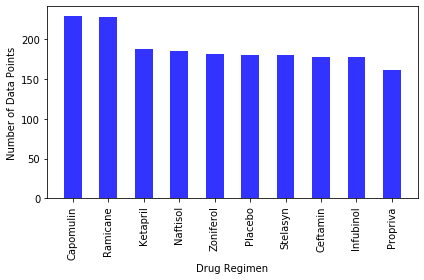

In [7]:
#Graphing with plt
x_axis = np.arange(len(drug_values))
tick_locations = [value for value in x_axis]  


    # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6,4))
plt.xticks(tick_locations, drug_values.index.values, rotation="vertical")
plt.bar(x_axis, drug_values["Count"], color='b', alpha=0.8, align="center", width = .5)
# plt.xticks(tick_locations, drug_count, rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.tight_layout()

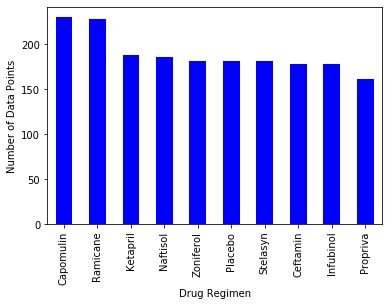

<Figure size 432x288 with 0 Axes>

In [8]:
#Graphing with pyplot
# Configure plot and ticks
drug_values["Count"].plot(kind="bar", facecolor="blue", legend=False)

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")


# Show plot
plt.show()  
plt.tight_layout()

## Pie Plots

In [9]:
#Make  dataframe with gender
gender_data= merge_data.groupby("Mouse ID").first()
gender_cnt= gender_data["Sex"].value_counts()
gender_cnt= pd.DataFrame({"Sex":gender_cnt})
gender_cnt


,Sex
Male,125
Female,124


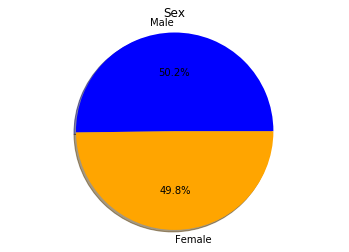

In [10]:
#Pie chart with plt
colors = ["blue", "orange"]
explode = (0, 0)
plt.pie(gender_cnt["Sex"], explode=explode, labels=gender_cnt.index.values, colors=colors,autopct="%1.1f%%", shadow=True, startangle=360)
plt.axis("equal")
plt.title("Sex")
plt.show()

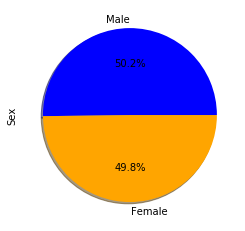

In [11]:
#Pie chart with pyplot
gender_cnt["Sex"].plot(kind="pie", explode=explode, labels=gender_cnt.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=360, legend=False)

## Quartiles, Outliers & Boxplots

In [12]:
#Filter data value with adequate drug 
filtered_df = merge_data.loc[(merge_data["Drug Regimen"] == "Capomulin") | (merge_data["Drug Regimen"] == "Ramicane") | (merge_data["Drug Regimen"] == "Ceftamin") | (merge_data["Drug Regimen"] == "Infubinol"), :]

# Filtered Capomulin
filtered_capo= merge_data.loc[(merge_data["Drug Regimen"] == "Capomulin"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filtered_capo= filtered_capo.sort_values("Timepoint", ascending= True)
filtered_capo = filtered_capo.drop_duplicates(subset="Mouse ID", keep='last')

# Filtered Ramicane
filtered_rami= merge_data.loc[(merge_data["Drug Regimen"] == "Ramicane"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filtered_rami= filtered_rami.sort_values("Timepoint", ascending= True)
filtered_rami= filtered_rami.drop_duplicates(subset="Mouse ID", keep='last')

# Filtered Infubinol
filtered_infu= merge_data.loc[(merge_data["Drug Regimen"] == "Infubinol"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filtered_infu= filtered_infu.sort_values("Timepoint", ascending= True)
filtered_infu= filtered_infu.drop_duplicates(subset="Mouse ID", keep='last')

# Filtered Ceftamin
filtered_ceft= merge_data.loc[(merge_data["Drug Regimen"] == "Ceftamin"), :]
#Find the final tumor of each mouse by sorting and droping duplicates
filtered_ceft= filtered_ceft.sort_values("Timepoint", ascending= True)
filtered_ceft= filtered_ceft.drop_duplicates(subset="Mouse ID", keep='last')


In [13]:
#Find the quartiles for Capomulin
quartiles = filtered_capo["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)
# outliers= filtered_capo.loc[(filtered_capo["Tumor Volume (mm3)"] > upper_bound) | (filtered_capo["Tumor Volume (mm3)"] < lower_bound),:]


print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {round(quartiles[0.5],2)} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The the median of Capomulin is: 38.13 
Values below 20.71 could be outliers.
Values above 51.83 could be outliers.


In [14]:
#Find the quartiles for Ramicane
quartiles = filtered_rami["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)


print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {round(quartiles[0.5],2)} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The the median of Ramicane is: 36.56 
Values below 17.91 could be outliers.
Values above 54.31 could be outliers.


In [15]:
#Find the quartiles for Infubinol
quartiles = filtered_infu["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)


print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {round(quartiles[0.5],2)} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The the median of Infubinol is: 60.17 
Values below 36.83 could be outliers.
Values above 82.75 could be outliers.


In [16]:
#Find the quartiles for Ceftamin
quartiles = filtered_ceft["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = round(quartiles[0.25],2)
upperq = round(quartiles[0.75],2)
iqr = round(upperq-lowerq,2)

lower_bound = round(lowerq - (1.5*iqr),2)
upper_bound = round(upperq + (1.5*iqr),2)


print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {round(quartiles[0.5],2)} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 48.72
The upper quartile of Ceftamin is: 64.3
The interquartile range of Ceftamin is: 15.58
The the median of Ceftamin is: 59.85 
Values below 25.35 could be outliers.
Values above 87.67 could be outliers.


In [17]:
# capom= filtered_df.loc[(filtered_df["Drug Regimen"] == "Capomulin"), :]
# capom= capom.set_index("Drug Regimen")
# ram= filtered_df.loc[(filtered_df["Drug Regimen"] == "Ramicane"), :]
# ram= ram.set_index("Drug Regimen")
# infu= filtered_df.loc[(filtered_df["Drug Regimen"] == "Infubinol"), :]
# infu= infu.set_index("Drug Regimen")
# ceft= filtered_df.loc[(filtered_df["Drug Regimen"] == "Ceftamin"), :]
# ceft= ceft.set_index("Drug Regimen")


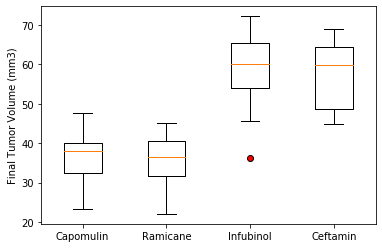

In [18]:
Tumor_capom = filtered_capo['Tumor Volume (mm3)']
Tumor_ram = filtered_rami['Tumor Volume (mm3)']
Tumor_infu = filtered_infu['Tumor Volume (mm3)']
Tumor_ceft = filtered_ceft['Tumor Volume (mm3)']
data= [Tumor_capom, Tumor_ram, Tumor_infu, Tumor_ceft]
fig1, ax1 = plt.subplots()
red_circle = dict(markerfacecolor='r')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(data, flierprops=red_circle)
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.show()

## Line and Scatter Plots

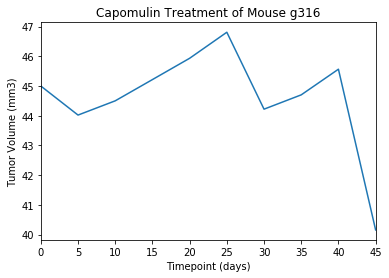

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a line plot
# Single Mouse has an ID of g316. Filter fot this Mouse ID along with the drug Capomulin
filtered_cap = merge_data.loc[(merge_data["Drug Regimen"] == "Capomulin"), :]
filtered_cap =filtered_cap.loc[(filtered_cap["Mouse ID"] == "g316"), :]
filtered_cap= filtered_cap[["Timepoint","Tumor Volume (mm3)"]]
filtered_cap= filtered_cap.set_index("Timepoint")
# Plot the graph
filtered_cap["Tumor Volume (mm3)"].plot(kind="line")
plt.title("Capomulin Treatment of Mouse g316")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(rotation=0)
plt.show()
plt.tight_layout()





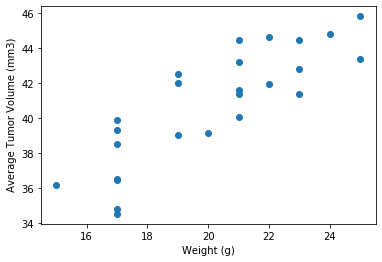

In [20]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capom= filtered_df.loc[(filtered_df["Drug Regimen"] == "Capomulin"), :]
capom= capom.set_index("Drug Regimen")

filtered_weight = capom.groupby('Mouse ID')


#Calculate Tumor Volume mean
capo_tumor_mean = (filtered_weight["Tumor Volume (mm3)"]).mean()

#Calculate Tumor Volume mean
capo_weight_mean = (filtered_weight["Weight (g)"]).mean()

# Creating a new DataFrame for scatter plot

plt.scatter(capo_weight_mean, capo_tumor_mean)
plt.xlabel("Weight (g)")
plt.ylabel(" Average Tumor Volume (mm3)")
plt.show()

# filtered_weight = merge_data.loc[(merge_data["Drug Regimen"] == "Capomulin"), :]
# filtered_weight =filtered_weight.loc[(filtered_cap["Mouse ID"] == "g316"), :]
# filtered_weight= filtered_weight[["Weight (g)","Tumor Volume (mm3)"]]
# filtered_cap= filtered_cap.set_index("Weight (g)")
# Plot the graph

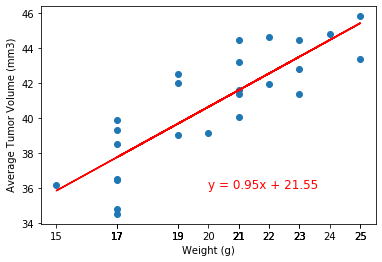

The correlation between weight and tumor value is 0.84


In [21]:
# Calculate the correlation coefficient & linear regression model for mouse weight & average tumor volume for the Capomulin 

# Get the previous calculated x & y values
capo_tumor_mean = (filtered_weight["Tumor Volume (mm3)"]).mean()
capo_weight_mean = (filtered_weight["Weight (g)"]).mean()

# Perform a linear regression on weight versus average tumor volume
slope, int, r, p, std_err = st.linregress(capo_weight_mean, capo_tumor_mean)
      
# Create equation of line to calculate average tumor volume
fit = slope * capo_weight_mean + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))


# Plot the linear model on top of scatter plot 
plt.scatter(capo_weight_mean, capo_tumor_mean)


plt.xlabel("Weight (g)")
plt.ylabel(" Average Tumor Volume (mm3)")
plt.plot(capo_weight_mean,fit,"r-")
plt.annotate(line_eq,(20,36),fontsize=12,color="red")
plt.xticks(capo_weight_mean)
plt.show()



# Caculate correlation coefficient
corr = round(st.pearsonr(capo_weight_mean,capo_tumor_mean)[0],2)
print(f'The correlation between weight and tumor value is {corr}')